In [90]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

# Crear los datos 

In [91]:
n = 100
d = 2
h = n//2

In [92]:
# Multiplico por 3 porque quiero centrar los puntos alrededor del 3 
data = np.random.randn(n,d)*3

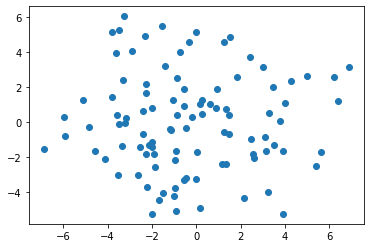

In [93]:
plt.scatter(data[:,0],data[:,1])
plt.show()

Como veo los datos estan muy dispersos, para tener unos datos que se comporten mejor para hacer la regresión logistica, voy a forzar la mitad de los datos a estar alrededor de -3 y la otra alrededor de 3

In [94]:
data[:h,:]=data[:h,:]-3*np.ones((h,d)) #Fuerzo la mitad inferior a estar alrededor de -3
data[h:,:]=data[h:,:]+3*np.ones((h,d)) #Fuerzo la mitad superior a estar alrededor de 3

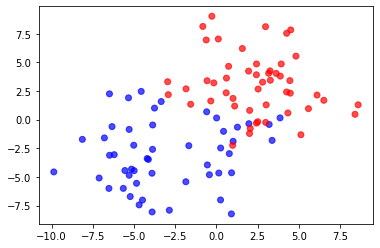

In [115]:
colors = ['blue','red']
color  = np.array([colors[0]]*h+[colors[1]]*h) 
plt.scatter(data[:,0],data[:,1],c=color,alpha=0.7)
plt.show()

Ahora los datos representados con rojo los convierto en 0 y los azules en 1

In [96]:
target = np.array([0]*h+[1]*h).reshape(n,1) #La representación de los datos en binario

#Creo los tensores
x = torch.from_numpy(data).float().requires_grad_(True)
y = torch.from_numpy(target).float()
x.shape,y.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

# Modelo

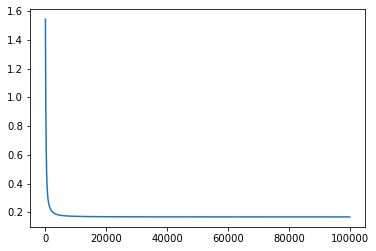

0.1679777204990387


In [103]:
model = nn.Sequential(       #Como tengo que aplicar el sigmoide a la función de la recta, utilizo Sequential()
             nn.Linear(2,1),  #que me ayuda a unficar estas dos funciones
             nn.Sigmoid()
        ) 

loss_funtion = nn.BCELoss()
optimizer    = optim.SGD(model.parameters(),lr=0.001)
model = nn.Sequential(
          nn.Linear(2,1),
          nn.Sigmoid()
      )
loss_function = nn.BCELoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

losses = []

iterations = 2000

for i in range(iterations):
  result = model(x)
  
  loss = loss_function(result, y)
  losses.append(loss.data)
  
  optimizer.zero_grad()
  loss.backward()
  
  optimizer.step()

plt.plot(range(iterations), losses)
loss

iterations = 100000

losses = []
for _ in range(iterations):
    pred = model(x)
    loss = loss_funtion(pred,y)
    losses.append(loss.data)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

plt.plot(range(iterations),losses)
plt.show()
print(float(loss))

# Predicción

In [136]:
blue = torch.Tensor([[-5,-5]])
prediction = model(blue).data[0][0] > 0.5
print(colors[prediction])

red = torch.Tensor([[8,6]])
prediction = model(red).data[0][0] > 0.5
print(colors[prediction])

blue
red


In [141]:
list(model.parameters())

[Parameter containing:
 tensor([[0.7037, 1.2609]], requires_grad=True),
 Parameter containing:
 tensor([-0.5431], requires_grad=True)]

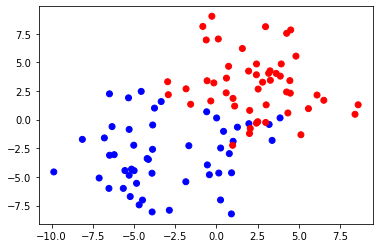

In [150]:
w  = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

plt.scatter(data[:,0],data[:,1],c=color)
plt.show()

Tenemos dos entradas (valores de los puntos en X y valores de los puntos en Y). Como tenemos un modelo lineal, este va a deparar la entradas con una línea (de color verde), que se describe con la ecuación de la recta:

$AX + BY + C = 0$

donde ->
<ul>
<li>A: pesos para las entradas en el eje X</li>
<li>B: pesos para las entradas en el eje Y</li>
<li>C: Umbral de activación del modelo</li>
</ul>

<ul>
    <li>A = w0[0][0]</li><li>B = w0[0][1]</li><li>C = w[1]</li>
</ul>

despejando Y de la ecuación de la recta, nos queda:

$Y = \large\frac{-(AX + C)}{B}$

y reemplazando A, B y C, nos queda:

Y = -(X * w0[0][0] + w[1]) / w[0][1]

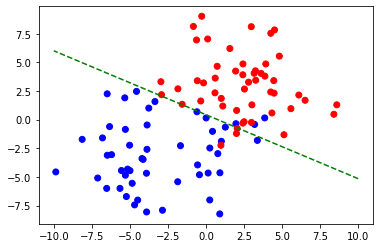

In [153]:
w  = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

plt.scatter(data[:,0],data[:,1],c=color)

x_axis = np.linspace(10,-10,n)
y_axis = -(x_axis*w0[0][0]+w1[0])/w0[0][1]
plt.plot(x_axis,y_axis,'g--')

plt.show()